In [63]:
import pandas as pd

# Load the arrests data
arrest_data = pd.read_csv('arrests.csv')

# Load the population data
pop_data = pd.read_csv('Population.csv')  # Replace with the actual path to your population data

# Drop any rows with missing values
arrest_data.dropna(inplace=True)

# Convert relevant columns to appropriate data types
arrest_data['INCIDENTNEIGHBORHOOD'] = arrest_data['INCIDENTNEIGHBORHOOD'].astype(str)

# Count the number of arrests per neighborhood
neighborhood_arrests = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
neighborhood_arrests.columns = ['Neighborhood', 'Arrests']

# Select relevant columns from population data
pop_data = pop_data[['Neighborhood', '2020_Total_Population']]
pop_data.rename(columns={'2020_Total_Population': 'Population'}, inplace=True)

# Merge with neighborhood population data
merged_data = pd.merge(neighborhood_arrests, pop_data, on='Neighborhood')

# Calculate arrests per capita
merged_data['Arrests_Per_Capita'] = merged_data['Arrests'] / merged_data['Population']

# Sort by arrests per capita and get the top 50 safest neighborhoods
top_50_safest = merged_data.nsmallest(50, 'Arrests_Per_Capita')

# Print the top 50 safest neighborhoods with rankings and more descriptive output
for rank, (index, row) in enumerate(top_50_safest.iterrows(), start=1):
    print(f"Rank {rank}: {row['Neighborhood']}")
    print(f"  - Population: {row['Population']}")
    print(f"  - Total Arrests: {row['Arrests']}")
    print(f"  - Arrests per Capita: {row['Arrests_Per_Capita']:.6f}")
    print()  # Print a new line for better readability


Rank 1: Central Northside
  - Population: 2972
  - Total Arrests: 23
  - Arrests per Capita: 0.007739

Rank 2: Swisshelm Park
  - Population: 1339
  - Total Arrests: 28
  - Arrests per Capita: 0.020911

Rank 3: Squirrel Hill North
  - Population: 11879
  - Total Arrests: 267
  - Arrests per Capita: 0.022477

Rank 4: Regent Square
  - Population: 971
  - Total Arrests: 25
  - Arrests per Capita: 0.025747

Rank 5: New Homestead
  - Population: 917
  - Total Arrests: 28
  - Arrests per Capita: 0.030534

Rank 6: North Oakland
  - Population: 10691
  - Total Arrests: 340
  - Arrests per Capita: 0.031802

Rank 7: Stanton Heights
  - Population: 4427
  - Total Arrests: 200
  - Arrests per Capita: 0.045177

Rank 8: Squirrel Hill South
  - Population: 15317
  - Total Arrests: 733
  - Arrests per Capita: 0.047855

Rank 9: Point Breeze
  - Population: 5348
  - Total Arrests: 270
  - Arrests per Capita: 0.050486

Rank 10: East Carnegie
  - Population: 491
  - Total Arrests: 25
  - Arrests per Capi

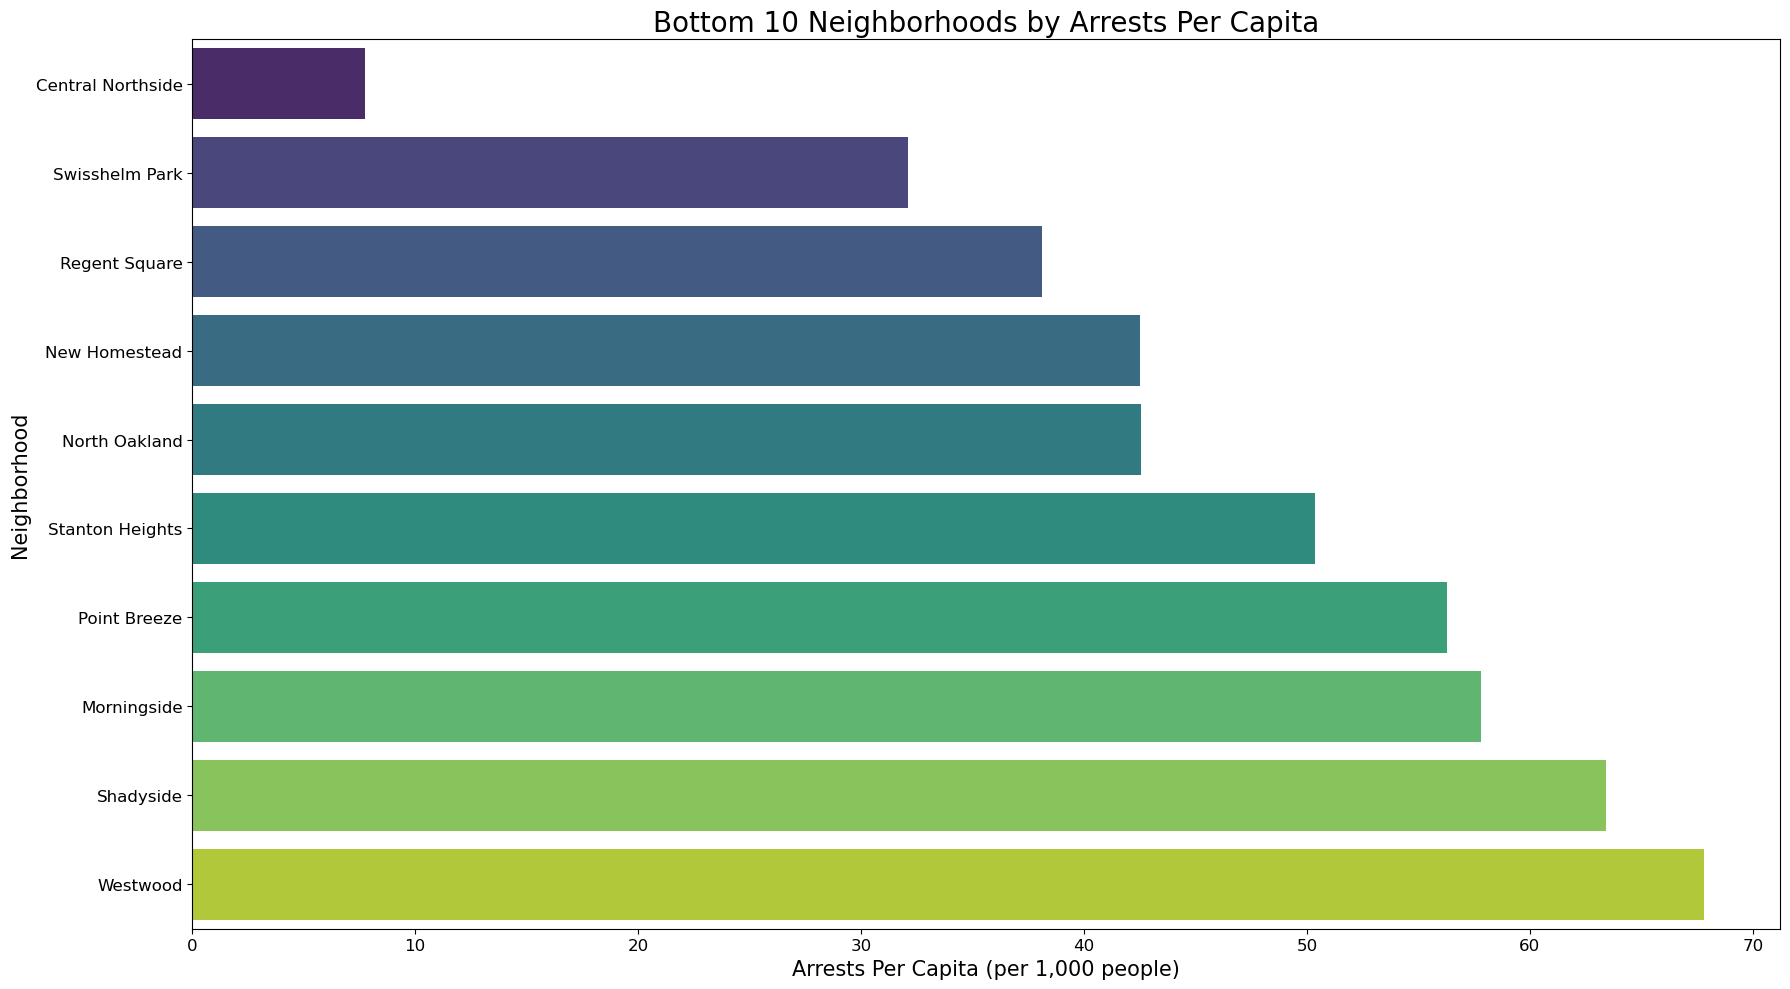

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

arrests_data = pd.read_csv('Arrests.csv')
population_data = pd.read_csv('Population.csv')

arrests_data.dropna(subset=['INCIDENTNEIGHBORHOOD'], inplace=True)

arrests_data['INCIDENTNEIGHBORHOOD'] = arrests_data['INCIDENTNEIGHBORHOOD'].astype(str)
population_data['Neighborhood'] = population_data['Neighborhood'].astype(str)

name_corrections = {
    'Lawrenceville South': 'Lawrenceville',
    'Lawrenceville North': 'Lawrenceville',
    'South Side': 'South Side Flats',
    'Southside': 'South Side Flats',
    'Squirrel Hill North': 'Squirrel Hill',
    'Squirrel Hill South': 'Squirrel Hill',
}

arrests_data['INCIDENTNEIGHBORHOOD'] = arrests_data['INCIDENTNEIGHBORHOOD'].replace(name_corrections)
population_data['Neighborhood'] = population_data['Neighborhood'].replace(name_corrections)

arrest_counts = arrests_data['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_counts.columns = ['Neighborhood', 'Arrests']

merged_data = pd.merge(arrest_counts, population_data[['Neighborhood', '2020_Total_Population']], on='Neighborhood')

merged_data['Arrests_Per_Capita'] = (merged_data['Arrests'] / merged_data['2020_Total_Population']) * 1000

bottom_arrests_per_capita = merged_data.nsmallest(10, 'Arrests_Per_Capita')

plt.figure(figsize=(18, 10))  # Increase figure size
sns.barplot(x='Arrests_Per_Capita', y='Neighborhood', hue='Neighborhood', dodge=False, data=bottom_arrests_per_capita, palette='viridis')
plt.title('Bottom 10 Neighborhoods by Arrests Per Capita', fontsize=20)
plt.xlabel('Arrests Per Capita (per 1,000 people)', fontsize=15)
plt.ylabel('Neighborhood', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.legend([], [], frameon=False)
plt.show()
